## 1.0 Business Problem

 hospitals's ultimate goal is to tease out meaningful and actionable insights from Patient-level collected data.
- help hospitals to be more efficient
- influence diagnostic and treatment processes
- map the spread of a pandemic.     

The company wants to know:    
- Which variables are significant in predicting the reason for hospitalization for different regions
- How well some variables like viral load, smoking, Severity Level describe the hospitalization charges

## 1.1 Data Problem    
perform EDA and statiscal tests to identify significant independent variables which influence the target variable  hospitalization charges. This will help build efficient models.

## 1.2 Column Profile

- **Age:** integer indicating age of primary beneficiary (excluding those above 64 years, since they are generally covered by the government).   
- **Sex:** This is the policy holder's gender, either male or female   
- **Viral Load:** Viral load refers to the amount of virus in an infected person's blood   
- **Severity Level:**  This is an integer indicating how severe the patient is
- **Smoker:** This is yes or no depending on whether the insured regularly smokes tobacco.
- **Region:** This is the beneficiary's place of residence in Delhi, divided into four geographic regions - northeast, southeast, southwest, or northwest
-**Hospitalization charges:** Individual medical costs billed to health insurance

##   1.3 Data Preparation

# 2.0 EDA

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/My Drive/case

/content/drive/My Drive/case


In [ ]:
df = pd.read_csv('hospitals.csv')

In [ ]:
df.head()

,Unnamed: 0,age,sex,smoker,region,viral load,severity level,hospitalization charges
0,0,19,female,yes,southwest,9.30,0,42212
1,1,18,male,no,southeast,11.26,1,4314
2,2,28,male,no,southeast,11.00,3,11124
3,3,33,male,no,northwest,7.57,0,54961
4,4,32,male,no,northwest,9.63,0,9667


In [ ]:
# remove Unnamed column
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1338 non-null   int64  
 1   sex                      1338 non-null   object 
 2   smoker                   1338 non-null   object 
 3   region                   1338 non-null   object 
 4   viral load               1338 non-null   float64
 5   severity level           1338 non-null   int64  
 6   hospitalization charges  1338 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 73.3+ KB


- dataset has 1338 rows and 7 columns
- there are no nulls in dataset

In [ ]:
df.nunique()

,0
age,47
sex,2
smoker,2
region,4
viral load,462
severity level,6
hospitalization charges,1320


- age,sex,smoker,region,severity level have low cardinality. they can be converted to category type

In [ ]:
# convert object columns to category
df['sex'] = df['sex'].astype('category')
df['smoker'] = df['smoker'].astype('category')
df['region'] = df['region'].astype('category')
df['severity level'] = df['severity level'].astype('category')

In [ ]:
df.describe().round(2)

,age,viral load,hospitalization charges
count,1338.00,1338.00,1338.00
mean,39.21,10.22,33176.06
std,14.05,2.03,30275.03
min,18.00,5.32,2805.00
25%,27.00,8.76,11851.00
50%,39.00,10.13,23455.00
75%,51.00,11.57,41599.50
max,64.00,17.71,159426.00


**Age**
- range = [18,64]  
- mean = 39.2

**viral load**
- range = [5.32,17.71]  
- mean = 10.22  

**hospitalization charges**
- range = [2805,159426]  
- mean = 33176.06

In [ ]:
df.describe(include='category').round(2)

,sex,smoker,region,severity level
count,1338,1338,1338,1338
unique,2,2,4,6
top,male,no,southeast,0
freq,676,1064,364,574


**sex**
- mode = male

**smoker**
- mode = no

**region**
- mode = southeast


**severity level**
- mode = 0

# 3.0 Univariate Analysis

In [ ]:
def plotcol(df,col):
    '''
    function to plot graph depending on datatype
    '''
    if col in df.select_dtypes('number').columns.tolist():
       fig, ax = plt.subplots(1,2, figsize=(10, 6))
       sns.histplot(data=df,x=col,kde='True',ax=ax[0])
       sns.boxplot(data=df,y=col,width=0.2,ax=ax[1])
       plt.subplots_adjust(wspace=0.3)
    elif col in df.select_dtypes('category').columns.tolist():
       sns.countplot(data=df,x=col)
    elif col in df.select_dtypes('datetime').columns.tolist():
        plotdate(df[col])
    plt.show()

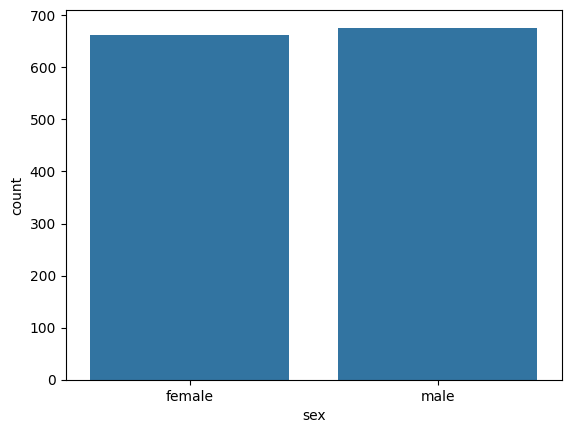

In [ ]:
plotcol(df,'sex')

In [ ]:
df['sex'].value_counts(normalize=True).round(4)*100

,proportion
sex,
male,50.52
female,49.48


sex ratio is roughtly equal

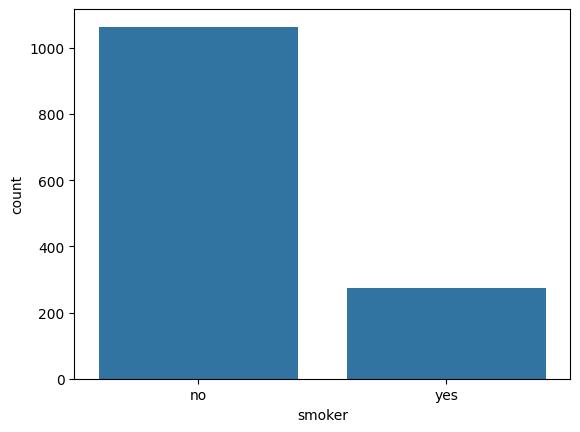

In [ ]:
plotcol(df,'smoker')

In [ ]:
df['smoker'].value_counts(normalize=True).round(4)*100

,proportion
smoker,
no,79.52
yes,20.48


smokers from majority with 80%

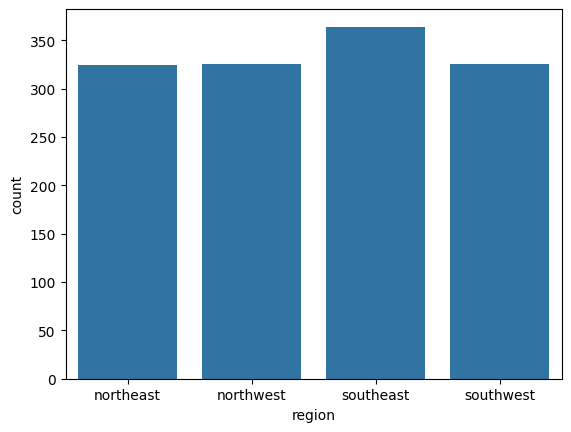

In [ ]:
plotcol(df,'region')

In [ ]:
df['region'].value_counts(normalize=True).round(4)*100

,proportion
region,
southeast,27.20
northwest,24.29
southwest,24.29
northeast,24.22


southeast region has slight majority  with 27%

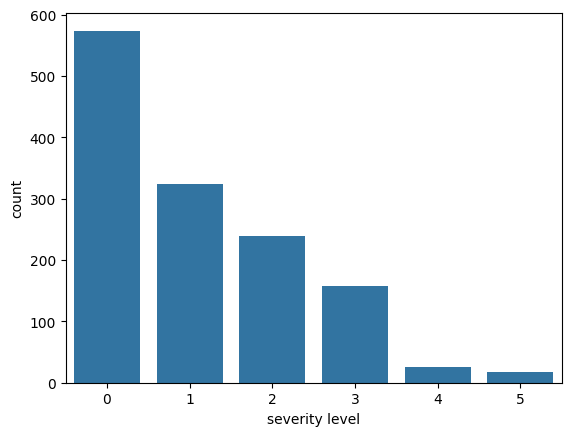

In [ ]:
plotcol(df,'severity level')

In [ ]:
df['severity level'].value_counts(normalize=True).round(4)*100

,proportion
severity level,
0,42.90
1,24.22
2,17.94
3,11.73
4,1.87
5,1.35


In [ ]:
df['severity level'].value_counts(normalize=True,sort=False,bins=[0,2,5]).round(4)*100

,proportion
"(-0.001, 2.0]",85.05
"(2.0, 5.0]",14.95


- Most common severity level is 0 (43%) followed by 1(24%) and 2(18%)
- severity levels 0-2 form 85% of patients

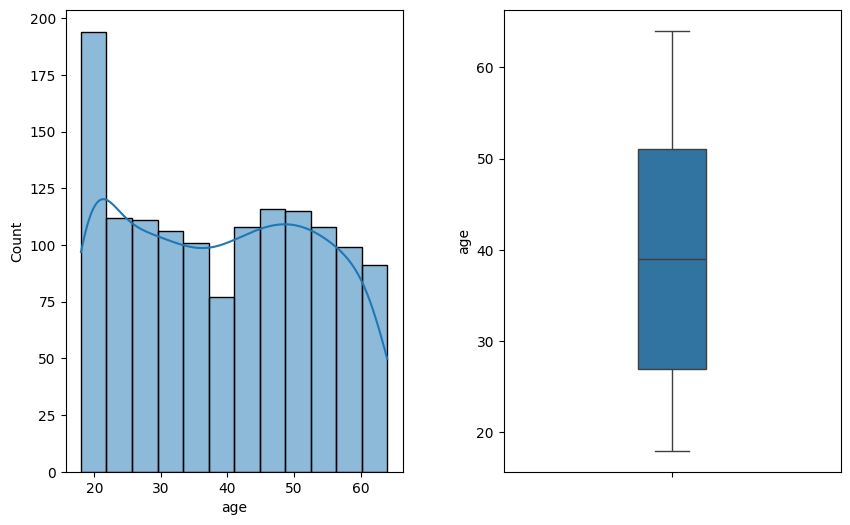

In [ ]:
plotcol(df,'age')

In [ ]:
df['age'].describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [ ]:
df['age'].value_counts(normalize=True,sort=False,bins=[0,20,40,60,70]).round(4)*100

,proportion
"(-0.001, 20.0]",12.41
"(20.0, 40.0]",39.99
"(40.0, 60.0]",40.81
"(60.0, 70.0]",6.80


- Graph shows peak for ages (0-20)   
- Ages 20-40 form 40% of population
- Ages 40-60 form 41% of population
- Ages 20-60 form 80% of patients

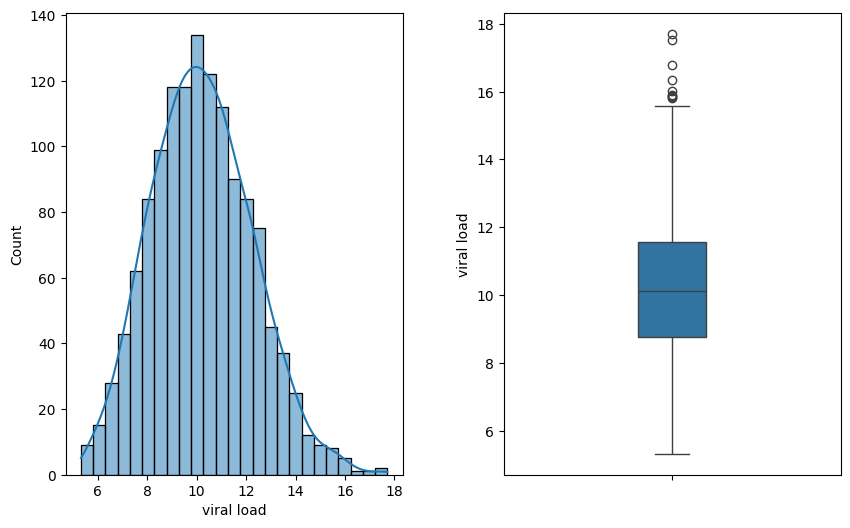

In [ ]:
plotcol(df,'viral load')

In [ ]:
df['viral load'].describe()

,viral load
count,1338.000000
mean,10.221233
std,2.032796
min,5.320000
25%,8.762500
50%,10.130000
75%,11.567500
max,17.710000


In [ ]:
df['viral load'].value_counts(normalize=True,sort=False,bins=[5,8,11,14,17,20]).round(4)*100

,proportion
"(4.999, 8.0]",14.05
"(8.0, 11.0]",51.87
"(11.0, 14.0]",30.42
"(14.0, 17.0]",3.51
"(17.0, 20.0]",0.15


- Graph shows peak at 10, with outliers beyond 16.
- data is normally distributed
- viral loads 8-14 form 82%

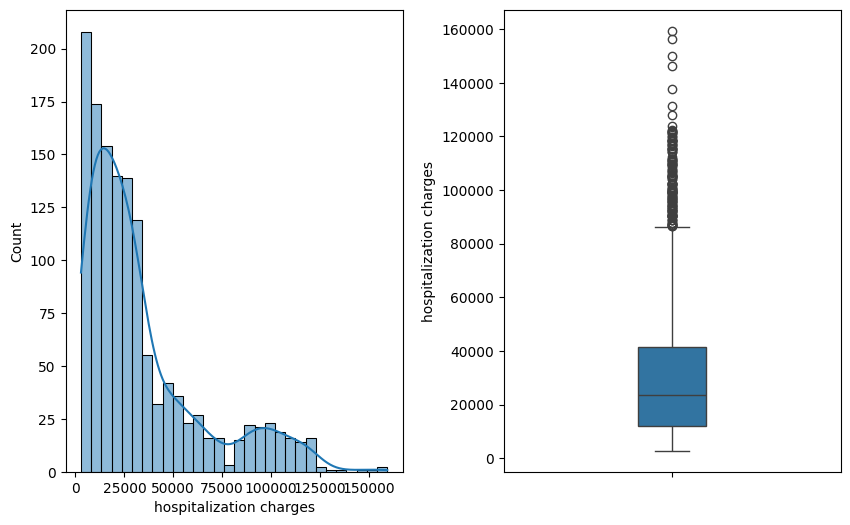

In [ ]:
plotcol(df,'hospitalization charges')

In [ ]:
df['hospitalization charges'].describe()

,hospitalization charges
count,1338.000000
mean,33176.058296
std,30275.029296
min,2805.000000
25%,11851.000000
50%,23455.000000
75%,41599.500000
max,159426.000000


In [ ]:
df['hospitalization charges'].value_counts(normalize=True,sort=False,
                            bins=[0,30000,60000,90000,120000,200000]).round(4)*100

,proportion
"(-0.001, 30000.0]",63.23
"(30000.0, 60000.0]",20.55
"(60000.0, 90000.0]",6.73
"(90000.0, 120000.0]",8.30
"(120000.0, 200000.0]",1.20


- Graph is skewed  
- mean = 33,176
- median = 23455
- outliers beyond 80,000
- charges 0-30000 form 63% of charges
- charges 30000-60000 form 21% of charges

 # 4.0 Bivariate Analysis

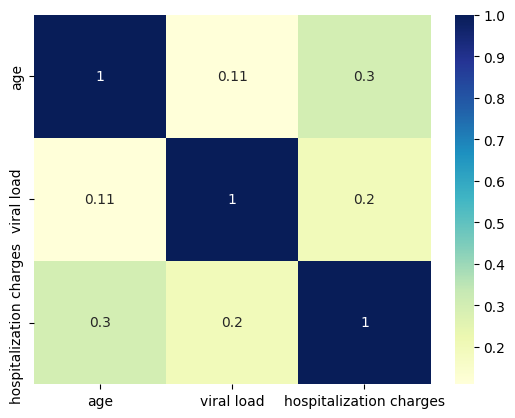

In [ ]:
# plotting correlation heatmap
num_df = df.select_dtypes(include=['number'])
dataplot = sns.heatmap(num_df.corr().round(2), cmap="YlGnBu", annot=True)

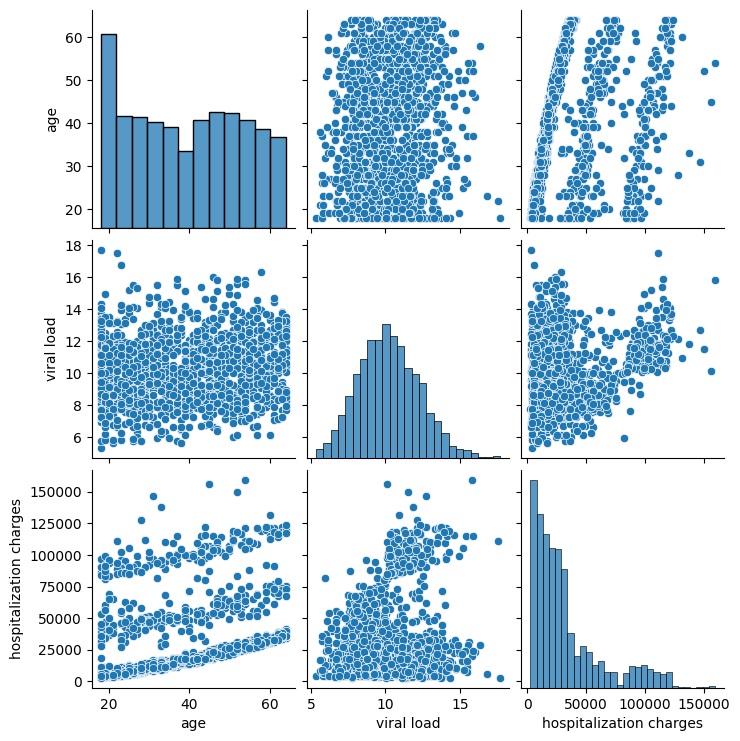

In [ ]:
sns.pairplot(df)
plt.show()

- plots do not show much correlation between numeric variables

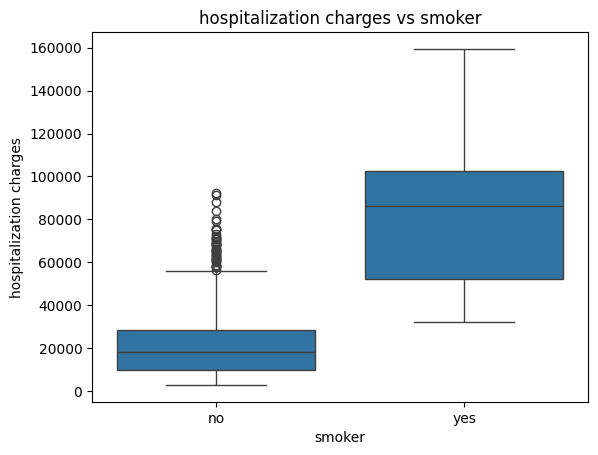

In [ ]:
sns.boxplot(data=df ,x='smoker',y='hospitalization charges')
plt.title("hospitalization charges vs smoker")
plt.show()

Graph shows that median of smokers is higher than non smokers

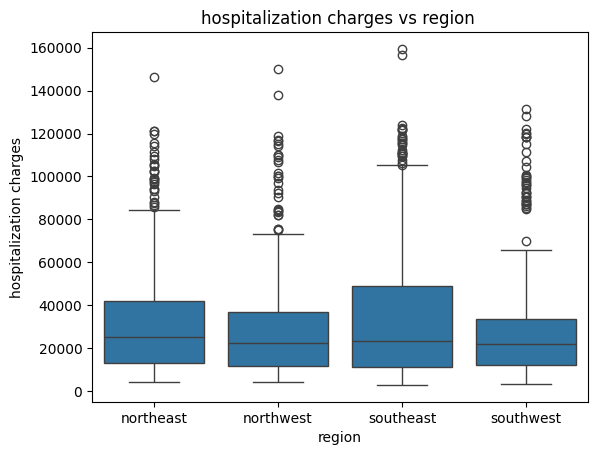

In [ ]:
sns.boxplot(data=df,x='region',y='hospitalization charges')
plt.title("hospitalization charges vs region ")
plt.show()

- median across regions is similar   
- varaince of southeast region is highest

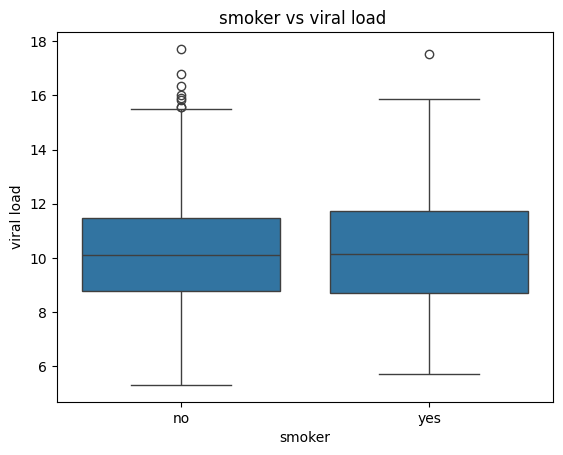

In [ ]:
sns.boxplot(data=df,y='viral load',x='smoker')
plt.title("smoker vs viral load ")
plt.show()

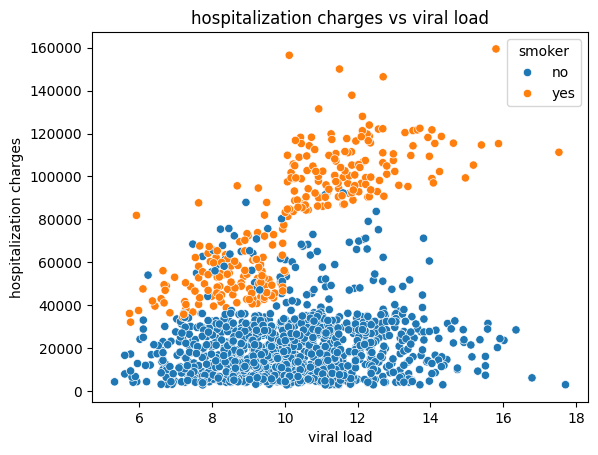

In [ ]:
sns.scatterplot(data=df,x='viral load',y='hospitalization charges',hue='smoker')
plt.title("hospitalization charges vs viral load")
plt.show()

graph shows that hospitalization charges for smokers is higher compared to non smokers

#  5.0 Insights based on EDA

## 5.1 univariate analysis

**Age**   

range = [18,64]   
mean = 39.2
- Ages 20-60 form 80% of patients

**viral load**     
range = [5.32,17.71]    
mean = 10.22   
- Graph shows peak at 10, with outliers beyond 16.
- data is normally distributed
- viral loads 8-14 form 82%

**hospitalization charges**  
- Graph is skewed  
- mean = 33,176
- median = 23455
- outliers beyond 80,000
- charges 0-30000 form 63% of charges

**sex** : sex ratio is roughly equal

**smoker**  
smokers from majority with 80%

**region**
southeast region has slight majority with 27%

**severity level**   
Most common severity level is 0 (43%) followed by 1(24%) and 2(18%)



## 5.2 bivariate analysis   
- median hospitalization charges of smokers is higher than non smokers    
- median hospitalization charges across regions is similar
- hospitalization charges variance of southeast region is more   
- viral load of smoker,non-smokers are similar  

# 6.0 Missing values & Outlier treatment

In [ ]:
df.isnull().sum()

,0
age,0
sex,0
smoker,0
region,0
viral load,0
severity level,0
hospitalization charges,0


dataset does not contain nulls

In [ ]:
def outlier(df, col):
    '''
    remove outliers using IQR
    '''
    #calculate q1,q3
    q1 = np.percentile(df[col],25)
    q3 = np.percentile(df[col],75)
    iqr = q3-q1
    #calculate high,low limit
    hl = q3+1.5*iqr
    ll = q1-1.5*iqr
    out = df[(df[col]>ll) & (df[col]<hl)]
    num= len(out)
    cnt_per=num*100/len(df)
    print(f'column: {col}')
    print(f'count : {num} percent: {round(100-cnt_per,2)}')
    return out

In [ ]:
clean_df= outlier(df,'hospitalization charges')

column: hospitalization charges
count : 1199 percent: 10.39


In [ ]:
clean_df= outlier(clean_df,'viral load')

column: viral load
count : 1186 percent: 1.08


In [ ]:
df_old=df.copy() # backup old data
df= clean_df     # assign clean_df to df

# 7.0 Hypothesis Testing

In [ ]:
def check_pval(pval,alpha=0.05):
    '''
    check significance of p-value
    default alpha=0.05
    '''
    print(f'p-value:{pval} alpha:{alpha}')
    if pval < alpha:
       print("Null Hypothesis rejected")
    else:
       print("Failed to reject Null hypothesis")

## 7.1 smoking significantly different across different regions?  

For testing smoker (category)  with region (category) we can use χ2 test of independence.   

### 7.1.1 Assumptions for χ2 test of independence  
1. Variables are categorical
2. Observations are independent
3. Each cell is mutually exclusive
4. Expected value in each cell is at least 5 (at least in 80% of cells)

### 7.1.2 Create sample data


In [ ]:
chi_data = pd.crosstab(df["smoker"], df["region"])
chi_data

region,northeast,northwest,southeast,southwest
smoker,,,,
no,256,267,262,263
yes,39,38,35,26


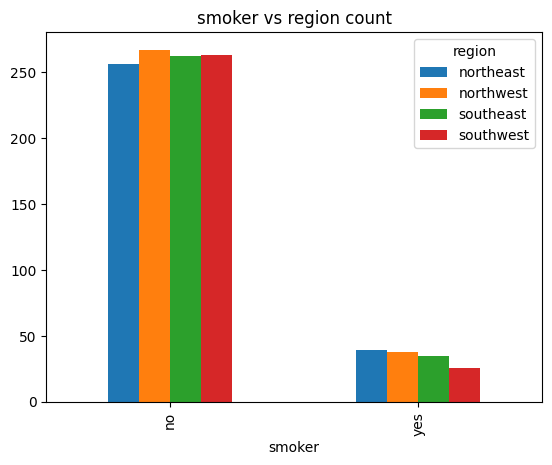

In [ ]:
chi_data.plot.bar()
plt.title('smoker vs region count')
plt.show()

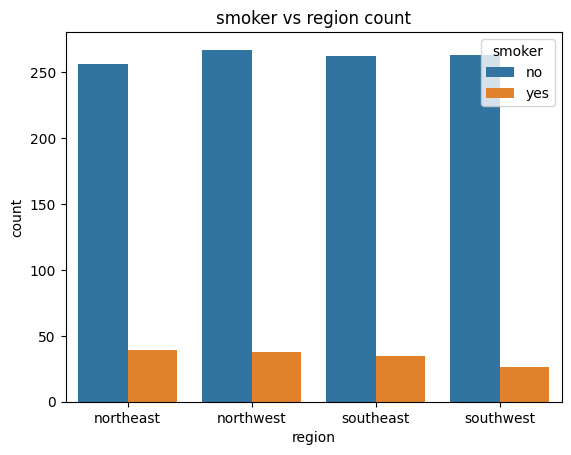

In [ ]:
sns.countplot(hue='smoker',x='region',data=df)
plt.title('smoker vs region count')
plt.show()

Visual inspection show not much difference between regions

###  7.1.3 Setup Null & Alternate hypothesis
Using χ2 we can check if "smoker" attribute has any effect on "region".   
**1. Null hypotheses(H0):** variables are independent   
**2. Alternative hypotheses(Ha):** variables are dependent   
Significance Level($\alpha$) = 0.05   

In [ ]:
#set significance level(alpha)
alpha=0.05

#perform ch-squared test
test_stat,p_val,dof,chi_out = st.chi2_contingency(chi_data)

#check significance
check_pval(p_val,alpha)

p-value:0.40958707478958256 alpha:0.05
Failed to reject Null hypothesis


### 7.1.4 Conclusion
Chi-squared test Failed to reject Null hypothesis. we can say with 95% confidence that "smoker"and "region" are independent

## 7.2 Prove (or disprove) that hospitalization of people who do smoking is greater than those who don't?

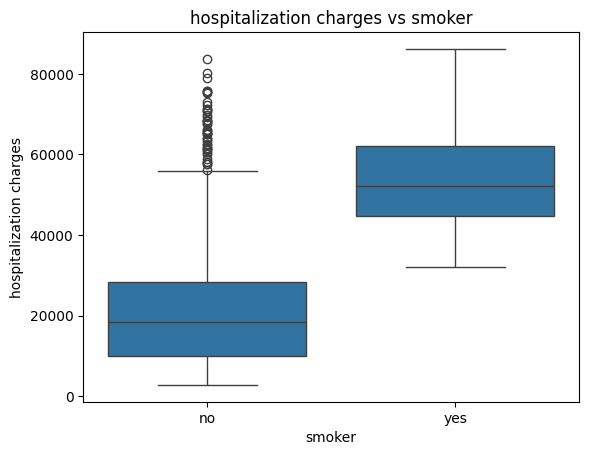

In [ ]:
sns.boxplot(data=df ,x='smoker',y='hospitalization charges')
plt.title("hospitalization charges vs smoker")
plt.show()

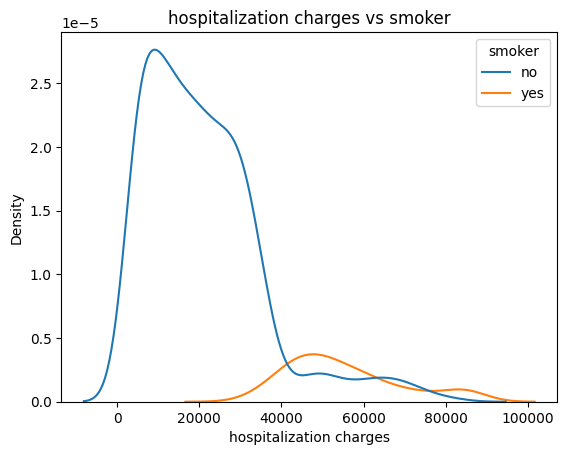

In [ ]:
sns.kdeplot(data=df,x='hospitalization charges',hue='smoker')
plt.title("hospitalization charges vs smoker")
plt.show()

median hospitalization charges for smoker is higher compared to non-smokers

### 7.2.1 T-test   
- smoker is categorical attribute
- hospitalization charges is Continuous attribute
For testing categorical with continuous attribute we can use T-test.
### Assumptions for T-test
1. Independence: the samples are independent
2. Normality : Data from the 2 groups follow normal distribution
3. Homogeneity of Variance: the 2 samples have same variance

In [ ]:
df.groupby('smoker')['hospitalization charges'].describe()

<ipython-input-51-518b11ba33a4>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('smoker')['hospitalization charges'].describe()


,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1048.0,20924.954198,14591.633765,2805.0,9966.25,18328.5,28385.25,83680.0
yes,138.0,55035.586957,13792.707698,32074.0,44784.50,52197.0,62048.50,86182.0


### 7.2.2 create sample data

In [ ]:
smoker=df[df['smoker']=='yes']['hospitalization charges']
non_smoker =df[df['smoker']=='no']['hospitalization charges']

In [ ]:
#create random sample from data
smpl0 = smoker.sample(n = 100)
smpl1 = non_smoker.sample(n = 100)

### 7.2.3 check t-test assumptions
### check normality using shapiro test
-H0 Null Hypothesis : Sample is normal   
-Ha Alternate Hypothesis : Sample is not normal   

In [ ]:
#check normality
test_stat,p_val = st.shapiro(smpl0)
check_pval(p_val)

p-value:1.5192391729992422e-05 alpha:0.05
Null Hypothesis rejected


In [ ]:
#check normality
test_stat,p_val = st.shapiro(smpl1)
check_pval(p_val)

p-value:5.397050118289743e-07 alpha:0.05
Null Hypothesis rejected


Result: samples(smpl0,smpl1) are not normally distributed

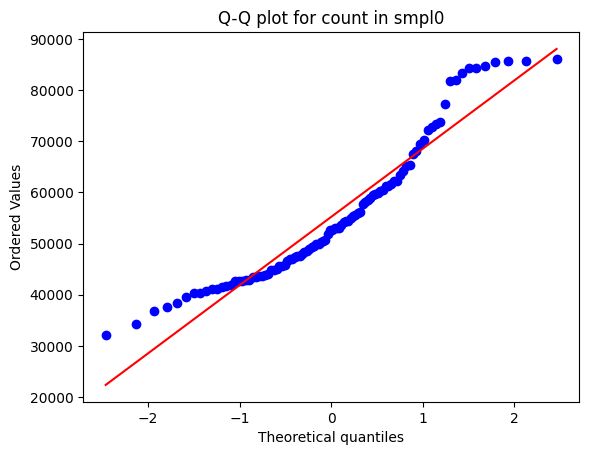

In [ ]:
# visual check of sample distribution
st.probplot(smpl0, plot= plt, dist="norm")
plt.title('Q-Q plot for count in smpl0')
plt.show()

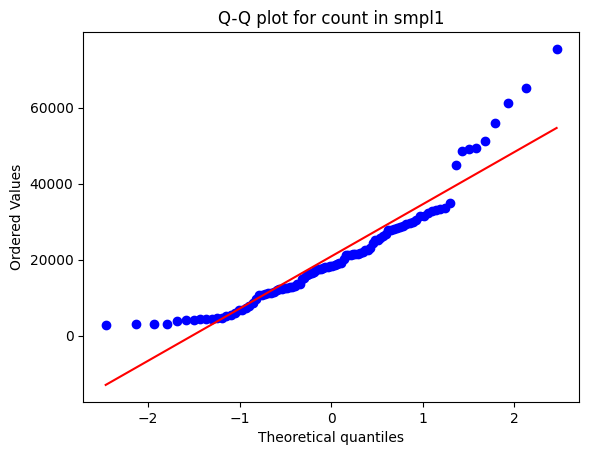

In [ ]:
# visual check of sample distribution
st.probplot(smpl1, plot= plt, dist="norm")
plt.title('Q-Q plot for count in smpl1')
plt.show()

### Check Homogeneity of Variances
###  levene test
-H_0 Null Hypothesis : variance is same   
-H_a Alternate Hypothesis : variance is not same    

In [ ]:
test_stat,p_val = st.levene(smpl0,smpl1)
check_pval(p_val)

p-value:0.8160437722994025 alpha:0.05
Failed to reject Null hypothesis


Result: samples(smpl0,smpl1) are of similar variance

### 7.2.4 Setup Null & Alternate hypothesis
Using T-Test we can check if "smoker" attribute has any effect on "hospitalization charges"  To test this we can setup
1. Null hypotheses(H0): Two group means are equal    
2. Alternative hypotheses(Ha): Two group means are not equal (two-tailed)    
$H_0 : μ_0 = μ_1$  
$H_a : μ_0 > μ_1$     



In [ ]:
#set significance level(alpha)
alpha=0.05

#perform 2 sample t-test
test_stat,p_val = st.ttest_ind(smpl0,smpl1,alternative='greater') # right-tailed test

#check significance
check_pval(p_val,alpha)

p-value:5.629887882954372e-42 alpha:0.05
Null Hypothesis rejected


### 7.2.5 Conclusion
t-test  rejected Null hypothesis. we can say with 95% confidence that mean hospitalization charges of "smoker" is higher than "non_smokers"  

In [ ]:
#set significance level(alpha)
alpha=0.05

test_stat,p_val = st.mannwhitneyu(smpl0,smpl1,alternative='greater') # right-tailed test

#check significance
check_pval(p_val,alpha)

p-value:2.274890723737935e-28 alpha:0.05
Null Hypothesis rejected


Since the distribution is not normal we can verify the result using non-parametric mannwhitneyu test. This test result aslo shows that mean hospitalization charges of  "smoker" is higher than "non_smokers"

## 7.3 Prove (or disprove) that viral load of females is different from that of males ?

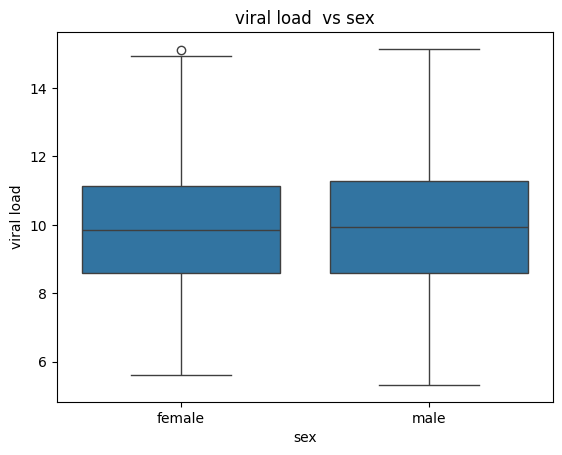

In [ ]:
sns.boxplot(data=df,x='sex',y='viral load')
plt.title("viral load  vs sex")
plt.show()

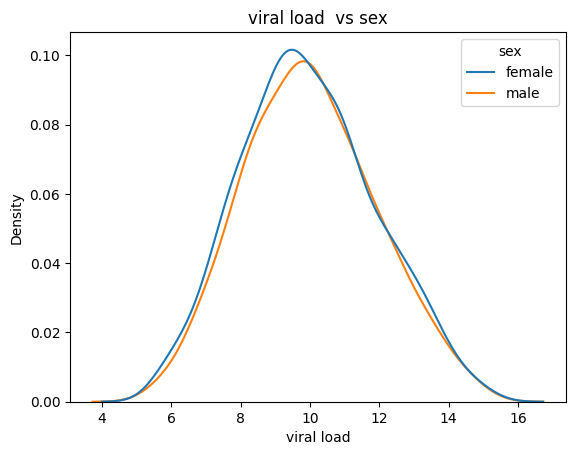

In [ ]:
sns.kdeplot(data=df,x='viral load',hue='sex')
plt.title("viral load  vs sex")
plt.show()

median viral load is similar for males,females

 ### 7.3.1 T-test
- sex is categorical attribute   
- viral load is Continuous attribute   
For testing categorical with continuous attribute we can use T-test.
### Assumptions for T-test
1. Independence: the samples are independent
2. Normality : Data from the 2 groups follow normal distribution
3. Homogeneity of Variance: the 2 samples have same variance

In [ ]:
df.groupby('sex')['viral load'].describe()

<ipython-input-63-b3889b6c8d60>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex')['viral load'].describe()


,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,608.0,9.940987,1.934166,5.60,8.58,9.84,11.1350,15.11
male,578.0,9.994896,1.896921,5.32,8.60,9.93,11.2675,15.14


### 7.3.2 create sample data

In [ ]:
male=df[df['sex']=='male']['viral load']
female =df[df['sex']=='female']['viral load']

In [ ]:
#create random sample from data
smpl0 = male.sample(n = 500)
smpl1 = female.sample(n = 500)

### 7.3.3 check t-test assumptions
### check normality using shapiro test
-H0 Null Hypothesis : Sample is normal   
-Ha Alternate Hypothesis : Sample is not normal   

In [ ]:
#check normality
test_stat,p_val = st.shapiro(smpl0)
check_pval(p_val)

p-value:0.057671001989816256 alpha:0.05
Failed to reject Null hypothesis


In [ ]:
#check normality
test_stat,p_val = st.shapiro(smpl1)
check_pval(p_val)

p-value:0.002820510966701841 alpha:0.05
Null Hypothesis rejected


Result: samples(smpl0,smpl1) are not normally distributed

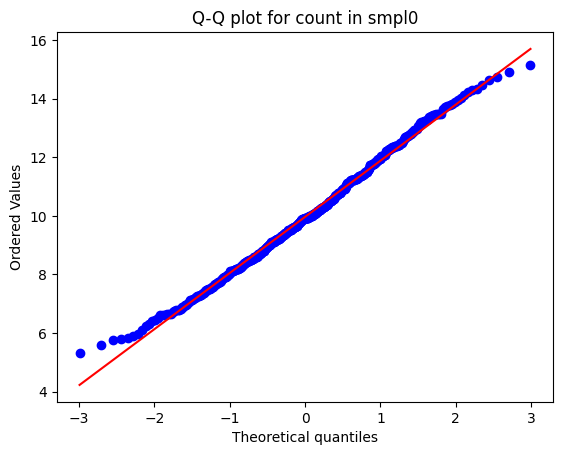

In [ ]:
# visual check of sample distribution
st.probplot(smpl0, plot= plt, dist="norm")
plt.title('Q-Q plot for count in smpl0')
plt.show()

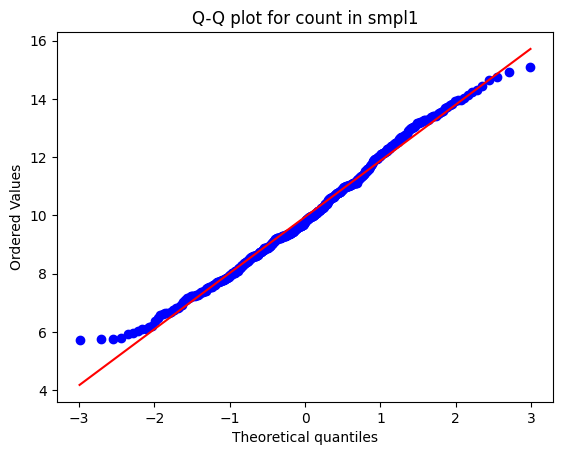

In [ ]:
# visual check of sample distribution
st.probplot(smpl1, plot= plt, dist="norm")
plt.title('Q-Q plot for count in smpl1')
plt.show()

### Check Homogeneity of Variances
### levene test
-H_0 Null Hypothesis : variance is same   
-H_a Alternate Hypothesis : variance is not same    

In [ ]:
test_stat,p_val = st.levene(smpl0,smpl1)
check_pval(p_val)

p-value:0.7363523269941042 alpha:0.05
Failed to reject Null hypothesis


Result: samples(smpl0,smpl1) are of similar variance

### 7.3.4 Setup Null & Alternate hypothesis
Using T-Test we can check if "workingday" attribute has any effect on "count" the number of cycles rented.To test this
we can setup
1. Null hypotheses(H0): Two group means are equal    
2. Alternative hypotheses(Ha): Two group means are not equal (two-tailed)    
$H_0 : μ_0 = μ_1$  
$H_a : μ_0 \neq μ_1$     



In [ ]:
#set significance level(alpha)
alpha=0.05/2

#perform 2 sample t-test
test_stat,p_val = st.ttest_ind(smpl0,smpl1) # 2-tailed test

#check significance
check_pval(p_val,alpha)

p-value:0.9281337433644339 alpha:0.025
Failed to reject Null hypothesis


### 7.3.5 Conclusion
t-test did not reject null hypothesis,we can say the means are equal with 95% confidence. So mean "viral load"  for 'male' and 'female' are equal.


In [ ]:
#set significance level(alpha)
alpha=0.05/2

#perform 2 sample t-test
test_stat,p_val = st.mannwhitneyu(smpl0,smpl1) # 2-tailed test

#check significance
check_pval(p_val,alpha)

p-value:0.8349471985004443 alpha:0.025
Failed to reject Null hypothesis


we also confirm reult with non-parmetric mannwhitneyu test. This test  did not reject null hypothesis,we can say the means are equal with 95% confidence. So mean "viral load"  for 'male' and 'female' are equal.

## 7.4 Is the mean viral load of women with 0 Severity level , 1 Severity level, and 2 Severity level the same

### 7.4.1 ANOVA   
severity level of women is categorical attribute with  severity level 0,1,2.     
viral load  is Continuous attribute      
For testing multiple(3 or more) season with count we can use ANOVA (Analysis of Variance).   
### Assumptions for ANOVA
1. Normality : Data for each groups follow normal distribution (gaussian)   
2. Independence: the samples are independent of other samples    
3. Homogeneity of Variance: equal variance of data in different groups    

### 7.4.2 create sample data

In [ ]:
fem= df[df['sex'] == 'female']

In [ ]:
fem.groupby('severity level')['viral load'].describe()

<ipython-input-74-06f961a0983f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fem.groupby('severity level')['viral load'].describe()


,count,mean,std,min,25%,50%,75%,max
severity level,,,,,,,,
0,269.0,9.967212,1.934359,5.76,8.610,9.700,11.1300,14.92
1,146.0,9.871507,1.871249,5.60,8.600,9.655,11.1025,15.11
2,105.0,9.891429,2.027979,5.73,8.330,10.050,11.1800,14.45
3,71.0,10.014366,1.950361,6.33,8.595,10.030,11.1750,14.90
4,10.0,10.601000,1.815063,8.53,9.620,9.825,11.0350,13.82
5,7.0,9.438571,2.197418,6.10,8.020,9.530,11.0350,12.33


In [ ]:
sev0 = fem[fem['severity level']== 0] ['viral load']
sev1 = fem[fem['severity level']== 1] ['viral load']
sev2 = fem[fem['severity level']== 2] ['viral load']

#create random sample from data
s0 = sev0.sample(n = 100)
s1 = sev1.sample(n = 100)
s2 = sev2.sample(n = 100)

In [ ]:
sev_df = pd.concat([sev0,sev1,sev2],axis=1)
sev_df.head()

,viral load,viral load,viral load
0,9.30,NaN,NaN
5,8.58,NaN,NaN
9,8.61,NaN,NaN
11,8.76,NaN,NaN
13,13.27,NaN,NaN


### 7.4.3 check ANOVA assumptions
###   Check Normality using shapiro test
-$H_0$ Null Hypothesis : Sample is normal    
-$H_a$ Alternate Hypothesis : Sample is not normal    

In [ ]:
#check normality
test_stat,p_val = st.shapiro(s0)
check_pval(p_val)

p-value:0.4055592013017478 alpha:0.05
Failed to reject Null hypothesis


In [ ]:
#check normality
test_stat,p_val = st.shapiro(s1)
check_pval(p_val)

p-value:0.606339907155781 alpha:0.05
Failed to reject Null hypothesis


In [ ]:
#check normality
test_stat,p_val = st.shapiro(s2)
check_pval(p_val)

p-value:0.3243917261335526 alpha:0.05
Failed to reject Null hypothesis


result: sample is normally distributed

### Check Homogeneity of Variances
**levene test**   
-$H_0$ Null Hypothesis : variance is same  
-$H_a$ Alternate Hypothesis : variance is not same  

In [ ]:
test_stat,p_val = st.levene(s0,s1,s2)
check_pval(p_val)

p-value:0.2574910360889885 alpha:0.05
Failed to reject Null hypothesis


Result: samples variance is  same

### 7.4.4 Setup Null & Alternate hypothesis
Using ANOVA we can check if "severity level" attribute has any effect on "viral load".To test this we can setup   
1. Null hypotheses(H0): group means are same   
2. Alternative hypotheses(Ha): Two group means are not same   
$H_0 : μ_1 = μ_2 = μ_3 = μ_4$   
$H_a : μ_1 \neq μ_2 \neq μ_3 \neq μ_4$    

In [ ]:
#set significance level(alpha)
alpha=0.05

test_stat,p_val = st.f_oneway(s0,s1,s2)

#check significance
check_pval(p_val,alpha)

p-value:0.8433902660522871 alpha:0.05
Failed to reject Null hypothesis


### 7.4.5 Conclusion   
ANOVA did not reject null hypothesis,we can say the means are equal with 95% confidence.  So mean "viral load" for 'female' are equal for severity level 0,1,2.

In [ ]:
#set significance level(alpha)
alpha=0.05

test_stat,p_val = st.kruskal(s0,s1,s2)

#check significance
check_pval(p_val,alpha)

p-value:0.7052301657152419 alpha:0.05
Failed to reject Null hypothesis


we also confirm using non-parametric kruskal test. This test did not reject null hypothesis,we can say the means are equal with 95% confidence.  So mean "viral load" for 'female' are equal for severity level 0,1,2.

# 8.0 Business Insights

 **Patient profile**   
 - patients are aged between 18 to 64 years, wth mean age of 39 years   
 - Ages 20-60 form 80% of patients   
 - severity levels 0-2 form 85% of patients
 - sex ratio is roughly equal
 - non-smokers from majority with 80%  
 - patient are uniformly distributed across regions

**hospitalization charges**
-  hospitalization charges of smokers is higher than non smokers
-  hospitalization charges across regions is similar
-  hospitalization charges 0-30000 form 63% of charges

**viral load**
- viral loads 8-14 form 82%  
- viral load for 'male' and 'female' is similar
- viral load for lower severity level in females  is similar
- viral load of smoker,non-smokers are similar

# 9.0 Recommendations

 - smoker spend more on hospital charges. Hence people should me made aware of dangers of smoking   
 - patients of severity level 0-2 form 85% of patients. Hence adequate accomodation and treatment facility should be provided for these patients    
 - patients of ages 20-80 form 80% of patients.Hence wellness programs can be designed for these patients  
 - viral loads 8-14 form 82% hence good identification and treatement facility can be provided for this group   
 -  hospitalization charges 0-30000 form 63% of charges. Hence more payment options can be provided to improve customer experience.
 - Since patients are uniformly distributed across regions. Similar policies should be implemented across regions to maintain this balance.
 - In area where the patients are not majority, high expenditure should be avoided to increase profits
 - Similarly more budget should be allocated for areas having majority so that resources are efficiently utilised